In [ ]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 1.5 MB/s 
     |████████████████████████████████| 86 kB 5.1 MB/s 
     |████████████████████████████████| 448 kB 24.5 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 155222 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
import pandas as pd
from konlpy.tag import Twitter 

import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/gdriv')

Mounted at /content/gdriv


In [ ]:
import os
data_path ="/content/gdriv/MyDrive/산데과"
data_list = os.listdir(data_path)
news = pd.read_csv(data_path +'/'+data_list[-1],encoding='utf-8')#encoding이 되게 중요함

In [ ]:
news['본문'][0:10]

0    울산·부산지역 중소기업의 이번달 업황전망이 부정적으로 나타났다... .. .. .....
1    2019년 기해(己亥)년은 천간은 음토(陰土)요, 지지는 해수(亥水)다... 천간 ...
2    지난해 북미와 일본 펀드는 높이 날았지만 그만큼 골도 깊었다... 미국과 일본의 경...
3    세계 뒤흔드는 트럼프노믹스 .. ..최소 1년은 상승장 전망 우세..美 실업률 49...
4    [머니투데이 뉴욕(미국)=송정렬 특파원] .. ..유가가 올해 마지막 거래일에 소폭...
5    [머니투데이 변휘 기자] ◆산업은행  <승진> ▷수석부행장 △성주영 ▷부행장(부문장...
6    [머니투데이 뉴욕(미국)=송정렬 특파원] .. ..달러가 약세를 보였다... 하지만...
7    지난해 천당과 지옥을 오갔던 국내 주식시장이 기해년 새해를 맞아 힘찬 도약을 준비하...
8    글로벌 경기 둔화 신호가 글로벌 곳곳에서 나오는 가운데 2019년 기업들의 실적도 ...
9    지난해 유가증권시장에서 3만7180원(227.82%) 올랐다. 12월28일 종가는 ...
Name: 본문, dtype: object

# 데이터 전처리 및 토큰화

In [ ]:
# 데이터 전처리 및 토큰화(명사만 걸러냈음)
from konlpy.tag import Kkma
kkma = Kkma()

import re

hangul = re.compile('[^ ㄱ-ㅣ가-힣]+')
token_list = []
for idx, text in enumerate(news['본문']):
  if idx < 1000:
    print('[Progress: {}/{}]'.format((idx+1),1000))
    result = hangul.sub('', text)
    for token in kkma.pos(result):
      if token[1] == 'NNG':
        if len(token[0])>1:
          token_list.append(token[0])

[Progress: 1/1000]
[Progress: 2/1000]
[Progress: 3/1000]
[Progress: 4/1000]
[Progress: 5/1000]
[Progress: 6/1000]
[Progress: 7/1000]
[Progress: 8/1000]
[Progress: 9/1000]
[Progress: 10/1000]
[Progress: 11/1000]
[Progress: 12/1000]
[Progress: 13/1000]
[Progress: 14/1000]
[Progress: 15/1000]
[Progress: 16/1000]
[Progress: 17/1000]
[Progress: 18/1000]
[Progress: 19/1000]
[Progress: 20/1000]
[Progress: 21/1000]
[Progress: 22/1000]
[Progress: 23/1000]
[Progress: 24/1000]
[Progress: 25/1000]
[Progress: 26/1000]
[Progress: 27/1000]
[Progress: 28/1000]
[Progress: 29/1000]
[Progress: 30/1000]
[Progress: 31/1000]
[Progress: 32/1000]
[Progress: 33/1000]
[Progress: 34/1000]
[Progress: 35/1000]
[Progress: 36/1000]
[Progress: 37/1000]
[Progress: 38/1000]
[Progress: 39/1000]
[Progress: 40/1000]
[Progress: 41/1000]
[Progress: 42/1000]
[Progress: 43/1000]
[Progress: 44/1000]
[Progress: 45/1000]
[Progress: 46/1000]
[Progress: 47/1000]
[Progress: 48/1000]
[Progress: 49/1000]
[Progress: 50/1000]
[Progress

In [ ]:
token_list

['울산',
 '부산',
 '지역',
 '중소기업',
 '이번',
 '전망',
 '부정적',
 '중소기업',
 '중앙회',
 '부산',
 '울산',
 '본부',
 '지역',
 '중소기업',
 '개사',
 '대상',
 '중소기업',
 '경기',
 '전망',
 '조사',
 '결과',
 '올해',
 '중소기업',
 '전망',
 '건강',
 '지수',
 '전달',
 '기해',
 '천간',
 '토요',
 '지지',
 '수다',
 '천간',
 '특성',
 '목화',
 '금수',
 '오행',
 '중심',
 '해당',
 '비습',
 '중정',
 '체성',
 '만물',
 '경제가',
 '위기',
 '우려',
 '걱정',
 '구성',
 '분석',
 '지난해',
 '북미',
 '일본',
 '펀드',
 '높이',
 '일본',
 '경제',
 '회복세',
 '지난해',
 '분기',
 '고공',
 '행진',
 '이후',
 '곤두박질',
 '수익률',
 '지역별',
 '꼴찌',
 '오명',
 '북미',
 '일본',
 '올해',
 '안정적',
 '성장',
 '펀드',
 '도약',
 '전망',
 '세계',
 '트럼프',
 '최소',
 '상승',
 '전망',
 '우세',
 '실업률',
 '최저',
 '경기',
 '순환',
 '초기',
 '단계',
 '가능성',
 '기초',
 '의견',
 '머니',
 '투데이',
 '정렬',
 '특파원',
 '유가',
 '올해',
 '마지막',
 '거래일',
 '소폭',
 '유가',
 '올해',
 '연간',
 '이상',
 '현지',
 '시간',
 '상업',
 '거래소',
 '서부',
 '텍사스',
 '원유',
 '전일',
 '대비',
 '배럴',
 '센트',
 '상승',
 '달러',
 '거래',
 '월간',
 '분기',
 '머니',
 '투데이',
 '기자',
 '산업',
 '은행',
 '승진',
 '수석',
 '부행장',
 '성주',
 '부행장',
 '부문장',
 '중소',
 '중견',
 '금융',
 '부문장',
 '오진',
 '혁신',
 '성장',
 '금융',

In [ ]:
dt_token_list = pd.DataFrame(token_list)[0].value_counts()

# word cloud 그리기

In [ ]:
dt_token_list# 이런 빈도 자료가 필요함

체결     921
매수     641
거래     603
매도     535
거래량    347
      ... 
토요       1
거액       1
포문       1
해상도      1
사도       1
Name: 0, Length: 2721, dtype: int64

In [ ]:
word = dict()
for i in range(len(dt_token_list)):
  word.update({list(dt_token_list.index)[i]:dt_token_list.iloc[0]})
print(word)

{'체결': 921, '매수': 921, '거래': 921, '매도': 921, '거래량': 921, '상승': 921, '강도': 921, '투자': 921, '대비': 921, '오전': 921, '시장': 921, '주가': 921, '증권': 921, '오후': 921, '현재': 921, '거래일': 921, '금융': 921, '기록': 921, '하락': 921, '강세': 921, '기자': 921, '지난해': 921, '주식': 921, '잔량': 921, '올해': 921, '지수': 921, '전일': 921, '증시': 921, '유지': 921, '회전율': 921, '대금': 921, '전망': 921, '코스': 921, '변동': 921, '지분': 921, '거래소': 921, '기업': 921, '개장': 921, '코스닥': 921, '종목': 921, '반전': 921, '국내': 921, '흐름': 921, '경제': 921, '증가': 921, '경기': 921, '기관': 921, '외국인': 921, '투자자': 921, '본부장': 921, '포인트': 921, '최근': 921, '새해': 921, '분기': 921, '우위': 921, '공시': 921, '실적': 921, '이후': 921, '시각': 921, '상장': 921, '개인': 921, '발표': 921, '한국': 921, '마감': 921, '급증': 921, '기준': 921, '이번': 921, '관계자': 921, '분전': 921, '직전': 921, '주요': 921, '업종': 921, '자산': 921, '이상': 921, '투데이': 921, '머니': 921, '산업': 921, '분석': 921, '매매': 921, '서울': 921, '보고': 921, '아시아': 921, '한때': 921, '최대': 921, '주주': 921, '운용': 921, '연구원': 921, '시간': 921, '목적': 921, '둔화': 

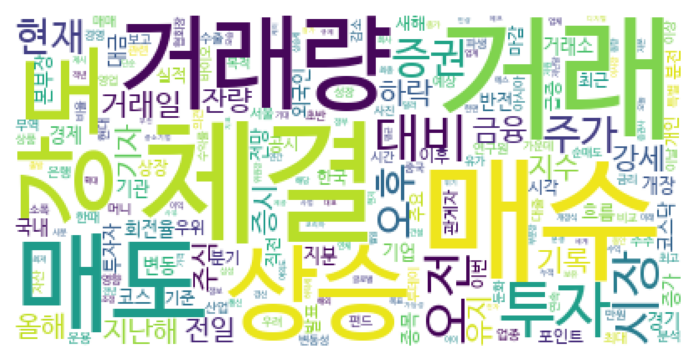

In [ ]:
# word cloud 만들기
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',background_color='white').generate_from_frequencies(word) 
#font_path는 우리가 처음에 설정해줬던 것과 같이 설정해줌
plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()

In [ ]:
def google_authenticate():
  # Authenticate first so the Google Drive library can detect your credentials.
  from google.colab import auth
  auth.authenticate_user()

  from googleapiclient.discovery import build
  drive_service = build('drive', 'v3')
  return drive_service

In [ ]:
drive_service = google_authenticate()

In [ ]:
def read_file(file_id):

  
  file_id = file_id

  import io
  from googleapiclient.http import MediaIoBaseDownload

  request = drive_service.files().get_media(fileId=file_id)
  downloaded = io.BytesIO()
  downloader = MediaIoBaseDownload(downloaded, request)
  done = False
  while done is False:
    _, done = downloader.next_chunk()

  downloaded.seek(0)
  return downloaded

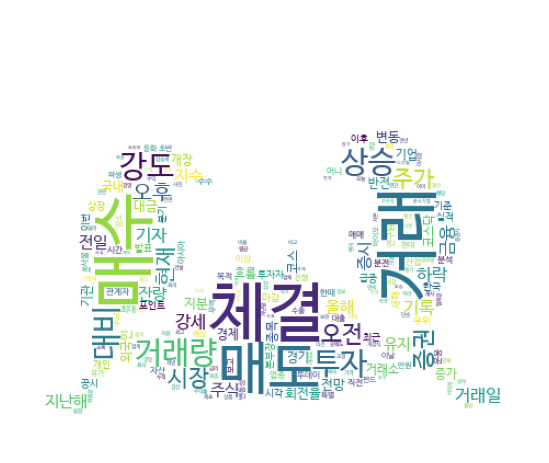

In [ ]:
from PIL import Image
#image_file = read_file("1sVG9bZ1LXyreX9SYQ92EbEOd8_Q009bX")
# create mask
image_mask = np.array(Image.open("/content/gdriv/MyDrive/krabby.png"))

wordcloud = WordCloud(font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',mask = image_mask,background_color='white').generate_from_frequencies(word) 

plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()


In [ ]:
image_mask.shape

(1300, 1400)